Télécharger le dataset au lien suivant: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows  
Charger l'archive dans vos Fichiers Colab puis dézippé la:

In [1]:
# Unzip file
# !unzip archive.zip

Importation des librairies nécessaires:

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

1. Lire le fichier imdb_top_1000.csv (pd.read_csv) et print les 5 premières lignes

In [3]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


2. Combien y'a t-il de lignes et de colonnes et print les noms de colonne

In [4]:
# Print rows
print(f'Number of rows: {df.shape[0]}')
# Print columns
print(f'Number of columns: {df.shape[1]}')
# Column names
print(f'Columns: {list(df.columns)}')

Number of rows: 1000
Number of columns: 16
Columns: ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [5]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

3. Sélectionner seulement les colonnes suivantes:  
Series_Title, Released_Year, Runtime, Genre, IMDB_Rating, Overview, Director

In [6]:
df = df[["Series_Title", "Released_Year", "Runtime", "Genre", "IMDB_Rating", "Overview", "Director"]]
df.shape

(1000, 7)

4. Renommer la colonne Series_Title en Title et IMDB_Rating en Score:

In [7]:
df = df.rename(columns={'Series_Title':'Title', 'IMDB_Rating':'Score'})
df.sample(5)

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
608,Chugyeokja,2008,125 min,"Action, Crime, Thriller",7.8,A disgraced ex-policeman who runs a small ring...,Hong-jin Na
948,The Others,2001,101 min,"Horror, Mystery, Thriller",7.6,A woman who lives in her darkened old family h...,Alejandro Amenábar
27,Se7en,1995,127 min,"Crime, Drama, Mystery",8.6,"Two detectives, a rookie and a veteran, hunt a...",David Fincher
60,Avengers: Infinity War,2018,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,Anthony Russo
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson


5. Dans la colonne Runtime, supprimer les chaînes de caractères pour ne garder que le temps en minute. A la fin de la manipulation la colonne doit être de type integer. Exemple: 112 min -> 112.

In [8]:
# Delete str and convert to int
df.Runtime = df.Runtime.str.replace(' min', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   Score          1000 non-null   float64
 5   Overview       1000 non-null   object 
 6   Director       1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


6. On observe une anomalie pour la colonne *Released_Year*. Cette colonne devrait être composé que de int. Affichez toutes les valeurs dans la colonne.

In [9]:
df.Released_Year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

7. On observe une valeur étrange, supprimez la ligne correspondante puis transformez le type de colonne en int. Faites aussi un reset des index. **Tips:** drop=True

In [10]:
# Select only non 'PG' rows
df = df[df.Released_Year != 'PG'].reset_index(drop=True)
# Change column type
df.Released_Year = df.Released_Year.astype(int)

8. Combien de réalisateurs sont listés ici ?

In [11]:
len(df.Director.unique())

548

9. Quel est le réalisateur le plus prolifique de ce dataset?

In [12]:
df.Director.value_counts()

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

10. Quelles sont les films réalisés par Christopher Nolan?

In [13]:
df[df.Director == 'Christopher Nolan']

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan
8,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan
21,Interstellar,2014,169,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,Christopher Nolan
36,The Prestige,2006,130,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",Christopher Nolan
63,The Dark Knight Rises,2012,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,Christopher Nolan
69,Memento,2000,113,"Mystery, Thriller",8.4,A man with short-term memory loss attempts to ...,Christopher Nolan
155,Batman Begins,2005,140,"Action, Adventure",8.2,"After training with his mentor, Batman begins ...",Christopher Nolan
573,Dunkirk,2017,106,"Action, Drama, History",7.8,"Allied soldiers from Belgium, the British Empi...",Christopher Nolan


11. Quelle est la durée moyenne de ces films? Et le score médian?

In [14]:
# Mean Runtime
print(f"Durée moyenne: {df[df.Director == 'Christopher Nolan'].Runtime.mean()}min")
# Median Score
print(f"Score médian: {df[df.Director == 'Christopher Nolan'].Score.median()}")

Durée moyenne: 140.25min
Score médian: 8.45


12. Retour au dataframe complet, combien de genre distinct existe-t-il ? Nommez les.

In [15]:
# Split all Genre seperated by a comma
all_genre = [i.split(',') for i in df.Genre.unique()]
# Flatten the list (1D)
all_genre = [item for sublist in all_genre for item in sublist]
# Suppress whitespaces (because ' Drama' is not the same as 'Drama')
all_genre = [i.replace(' ', '') for i in all_genre]
# Select each Genre only 1 time
print(set(all_genre))
# Get the number of unique Genre
print(len(set(all_genre)))

{'Family', 'History', 'Crime', 'Comedy', 'Film-Noir', 'War', 'Sport', 'Thriller', 'Animation', 'Drama', 'Action', 'Mystery', 'Sci-Fi', 'Music', 'Adventure', 'Biography', 'Musical', 'Horror', 'Fantasy', 'Romance', 'Western'}
21


13. En utilisant la fonction *groupby()*, compté le nombre de film sortie pour chaque date de la colonne Released_Year.

In [16]:
df[['Released_Year', 'Title']].groupby('Released_Year').count()

,Title
Released_Year,
1920,1
1921,1
1922,1
1924,1
1925,2
...,...
2016,28
2017,22
2018,19


14. Quelle année compte le plus grand nombre de sorties de films?

In [17]:
title_per_year = df[['Released_Year', 'Title']].groupby('Released_Year').count().sort_values('Title')
title_per_year

,Title
Released_Year,
1920,1
1937,1
1936,1
1930,1
1926,1
...,...
2013,28
2016,28
2009,29


15. Tracer un graphique montrant l'évolution du nombre de film par an

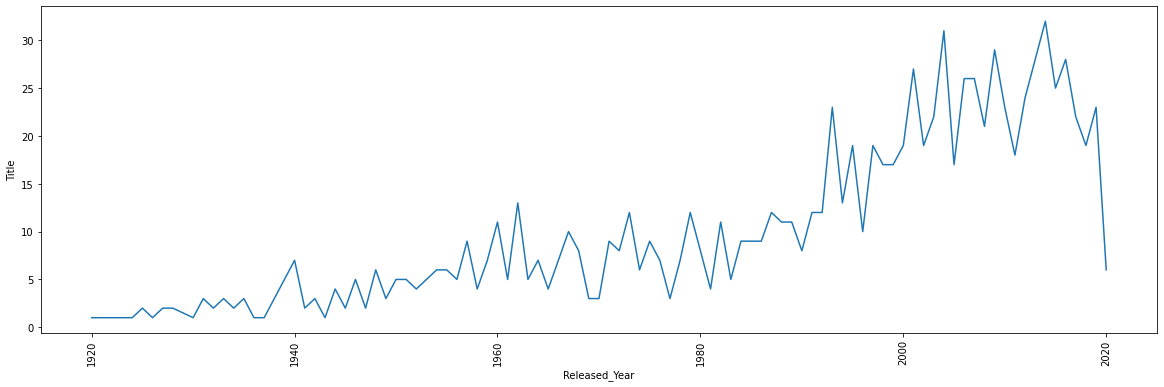

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# We need to modify a bit title_per_year
title_per_year = title_per_year.reset_index(drop=False).sort_values('Released_Year')

# Plot
plt.figure(figsize=(20,6))
sns.lineplot(data=title_per_year, x="Released_Year", y="Title")
plt.xticks(rotation=90)
plt.show()

In [19]:
title_per_year

,Released_Year,Title
0,1920,1
8,1921,1
7,1922,1
6,1924,1
15,1925,2
...,...,...
95,2016,28
84,2017,22
78,2018,19
86,2019,23


16. Combien de films chaque réalisateur a-t-il sortie par an ? **Tips:** regroupez les réalisateurs et les années de sorties puis comptez le nombre de titres.

In [20]:
df[['Director', 'Released_Year', 'Title']].groupby(['Director', 'Released_Year']).count().sort_values('Title')

Title
Director             Released_Year       
Aamir Khan           2007               1
Norman Jewison       1967               1
                     1971               1
                     1999               1
Nuri Bilge Ceylan    2011               1
...                                   ...
Francis Ford Coppola 1974               2
Clint Eastwood       2008               2
Mel Brooks           1974               2
Ingmar Bergman       1957               2
John Huston          1948               2

[989 rows x 1 columns]

17. Reprenez votre code précédent et ajoutez y le score moyen des films sorties la même année. **Tips:** utilisez *.agg()*

In [21]:
df[['Director', 'Released_Year', 'Title', 'Score']].groupby(['Director', 'Released_Year']).agg({'Title':'count', 'Score':'mean'}).sort_values('Title')

Title  Score
Director             Released_Year              
Aamir Khan           2007               1   8.40
Norman Jewison       1967               1   7.90
                     1971               1   8.00
                     1999               1   7.60
Nuri Bilge Ceylan    2011               1   7.90
...                                   ...    ...
Francis Ford Coppola 1974               2   8.40
Clint Eastwood       2008               2   7.90
Mel Brooks           1974               2   7.85
Ingmar Bergman       1957               2   8.20
John Huston          1948               2   8.00

[989 rows x 2 columns]

18. Créez un dataframe (*df2*) qui ne regroupe que les films des genres: Western et Comedy

In [22]:
df2 = df[(df.Genre == 'Western') | (df.Genre == 'Comedy')]
df2

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
12,"Il buono, il brutto, il cattivo",1966,161,Western,8.8,A bounty hunting scam joins two men in an unea...,Sergio Leone
48,Once Upon a Time in the West,1968,165,Western,8.5,A mysterious stranger with a harmonica joins f...,Sergio Leone
78,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,Comedy,8.4,An insane general triggers a path to nuclear h...,Stanley Kubrick
115,Per qualche dollaro in più,1965,132,Western,8.3,Two bounty hunters with the same intentions te...,Sergio Leone
277,Life of Brian,1979,94,Comedy,8.1,Born on the original Christmas in the stable n...,Terry Jones
417,Young Frankenstein,1974,106,Comedy,8.0,An American grandson of the infamous scientist...,Mel Brooks
539,Le charme discret de la bourgeoisie,1972,102,Comedy,7.9,"A surreal, virtually plotless series of dreams...",Luis Buñuel
679,Ferris Bueller's Day Off,1986,103,Comedy,7.8,A high school wise guy is determined to have a...,John Hughes
691,The Outlaw Josey Wales,1976,135,Western,7.8,Missouri farmer Josey Wales joins a Confederat...,Clint Eastwood
750,The Hangover,2009,100,Comedy,7.7,Three buddies wake up from a bachelor party in...,Todd Phillips


19. One-hot encodé la variable *Genre* de ce nouveau dataframe. **Tips:** jetez un oeil à la documentation pandas de [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)  
Ensuite supprimez la colonne Genre et vous devez obtenir un nouveau dataframe (*df3*) ayant comme forme (17,8).

In [23]:
df3 = pd.concat([df2.drop('Genre', axis=1), pd.get_dummies(df2.Genre)], axis=1)
print(df3.shape)
df3

(17, 8)


,Title,Released_Year,Runtime,Score,Overview,Director,Comedy,Western
12,"Il buono, il brutto, il cattivo",1966,161,8.8,A bounty hunting scam joins two men in an unea...,Sergio Leone,0,1
48,Once Upon a Time in the West,1968,165,8.5,A mysterious stranger with a harmonica joins f...,Sergio Leone,0,1
78,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,8.4,An insane general triggers a path to nuclear h...,Stanley Kubrick,1,0
115,Per qualche dollaro in più,1965,132,8.3,Two bounty hunters with the same intentions te...,Sergio Leone,0,1
277,Life of Brian,1979,94,8.1,Born on the original Christmas in the stable n...,Terry Jones,1,0
417,Young Frankenstein,1974,106,8.0,An American grandson of the infamous scientist...,Mel Brooks,1,0
539,Le charme discret de la bourgeoisie,1972,102,7.9,"A surreal, virtually plotless series of dreams...",Luis Buñuel,1,0
679,Ferris Bueller's Day Off,1986,103,7.8,A high school wise guy is determined to have a...,John Hughes,1,0
691,The Outlaw Josey Wales,1976,135,7.8,Missouri farmer Josey Wales joins a Confederat...,Clint Eastwood,0,1
750,The Hangover,2009,100,7.7,Three buddies wake up from a bachelor party in...,Todd Phillips,1,0


20. Ecrire un dictionnaire ayant pour clés Western et Comedy, et pour valeur Cow-Boy et Humour. Puis, en utilisant la fonction map, modifier la colonne Genre de *df2*.

In [24]:
# Create the dict
dictionnaire = {'Western':'Cow-Boy', 'Comedy':'Humour'}
df2.Genre = df2.Genre.map(dictionnaire)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Title,Released_Year,Runtime,Genre,Score,Overview,Director
12,"Il buono, il brutto, il cattivo",1966,161,Cow-Boy,8.8,A bounty hunting scam joins two men in an unea...,Sergio Leone
48,Once Upon a Time in the West,1968,165,Cow-Boy,8.5,A mysterious stranger with a harmonica joins f...,Sergio Leone
78,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,Humour,8.4,An insane general triggers a path to nuclear h...,Stanley Kubrick
115,Per qualche dollaro in più,1965,132,Cow-Boy,8.3,Two bounty hunters with the same intentions te...,Sergio Leone
277,Life of Brian,1979,94,Humour,8.1,Born on the original Christmas in the stable n...,Terry Jones
417,Young Frankenstein,1974,106,Humour,8.0,An American grandson of the infamous scientist...,Mel Brooks
539,Le charme discret de la bourgeoisie,1972,102,Humour,7.9,"A surreal, virtually plotless series of dreams...",Luis Buñuel
679,Ferris Bueller's Day Off,1986,103,Humour,7.8,A high school wise guy is determined to have a...,John Hughes
691,The Outlaw Josey Wales,1976,135,Cow-Boy,7.8,Missouri farmer Josey Wales joins a Confederat...,Clint Eastwood
750,The Hangover,2009,100,Humour,7.7,Three buddies wake up from a bachelor party in...,Todd Phillips


21. Pour l'ensemble des données (*df*), discrétisez les valeurs de scores comme ci-dessous:  
[7 ,  8[ => 'Très Bon'  
[8 ,  9[ => 'Excellent'  
[9 , 10[ => 'Incroyable'

In [25]:
# Loop over each row
for i in range(len(df)):
  if df.loc[i, 'Score'] < 8:
    df.loc[i, 'Score'] = 'Très Bon'
  elif (df.loc[i, 'Score'] >= 8) & (df.loc[i, 'Score'] < 9):
    df.loc[i, 'Score'] = 'Excellent'
  else:
    df.loc[i, 'Score'] = 'Très Bon'

In [26]:
df.sample(5)

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
600,The Big Short,2015,130,"Biography, Comedy, Drama",Très Bon,In 2006-2007 a group of investors bet against ...,Adam McKay
583,Captain America: Civil War,2016,147,"Action, Adventure, Sci-Fi",Très Bon,Political involvement in the Avengers' affairs...,Anthony Russo
287,Le samouraï,1967,105,"Crime, Drama, Mystery",Excellent,After professional hitman Jef Costello is seen...,Jean-Pierre Melville
501,Les choristes,2004,97,"Drama, Music",Très Bon,The new teacher at a severely administered boy...,Christophe Barratier
125,M - Eine Stadt sucht einen Mörder,1931,117,"Crime, Mystery, Thriller",Excellent,When the police in a German city are unable to...,Fritz Lang


22. Sauvegarder le nouveau dataframe *df*

In [27]:
df.to_csv('new_data.csv', sep=';', index=False)